<a href="https://colab.research.google.com/github/natashakarmali/nkarmali-uw.edu/blob/master/Neural_Network_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Testing Neural Network Models to Claffisfy Rock Paper Scissor Images**

# **Data Import**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-23 00:23:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   109MB/s    in 1.8s    

2020-04-23 00:23:23 (109 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-23 00:23:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps

In [2]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


# **Data Pre-Processing**

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-103.png', 'rock02-076.png', 'rock03-046.png', 'rock05ck01-084.png', 'rock03-117.png', 'rock02-054.png', 'rock03-012.png', 'rock02-022.png', 'rock04-063.png', 'rock04-031.png']
['paper01-076.png', 'paper06-022.png', 'paper07-004.png', 'paper05-026.png', 'paper02-099.png', 'paper04-098.png', 'paper01-007.png', 'paper02-118.png', 'paper07-036.png', 'paper02-059.png']
['scissors01-109.png', 'scissors04-052.png', 'scissors01-040.png', 'scissors03-039.png', 'scissors01-084.png', 'scissors01-048.png', 'testscissors03-026.png', 'testscissors03-041.png', 'testscissors03-072.png', 'scissors02-103.png']


# **Data Visualization**

/tmp/rps/rock/rock06ck02-103.png


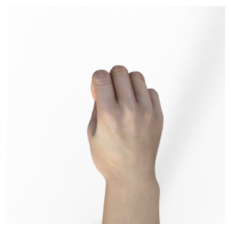

/tmp/rps/rock/rock02-076.png


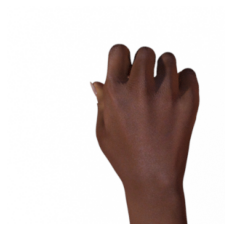

/tmp/rps/paper/paper01-076.png


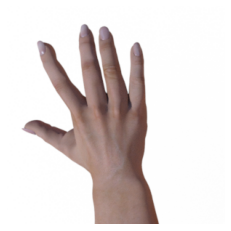

/tmp/rps/paper/paper06-022.png


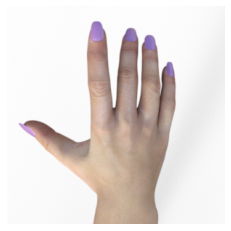

/tmp/rps/scissors/scissors01-109.png


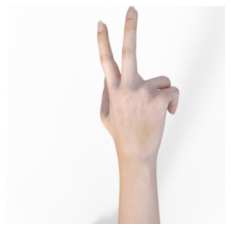

/tmp/rps/scissors/scissors04-052.png


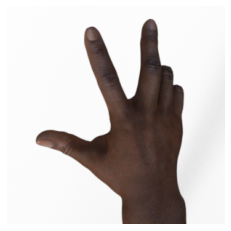

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# **Data Processing**

In [0]:
import shutil
# Creating train and test subsets
#path to main directory
original_dataset_dir = '/tmp'

#directory to store subsets
base_dir = '/tmp/rock_paper_scissors'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

#directories for our training, test
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#directory for each class train
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

#directory for each class validation
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

#directory for each class test
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)

In [0]:
#renaming
os.chdir('/tmp/rps/paper')
i=0
for x in os.listdir('/tmp/rps/paper'):
  src = x
  dst = 'paper'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

os.chdir('/tmp/rps/rock')
i=0
for x in os.listdir('/tmp/rps/rock'):
  src = x
  dst = 'rock'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

os.chdir('/tmp/rps/scissors')
i=0
for x in os.listdir('/tmp/rps/scissors'):
  src = x
  dst = 'scissors'+str(i)+'.png'
  os.rename(src,dst)
  i = i + 1

In [0]:
#copying images
fnames = ['paper{}.png'.format(i) for i in range(420)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(train_paper_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['paper{}.png'.format(i) for i in range(420, 630)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(validation_paper_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['paper{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/paper', fname)
  dst = os.path.join(test_paper_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['rock{}.png'.format(i) for i in range(420)]
for fname in fnames:
  src = os.path.join('/tmp/rps/rock', fname)
  dst = os.path.join(train_rock_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['rock{}.png'.format(i) for i in range(420, 630)]
for fname in fnames:
  src = os.path.join('/tmp/rps/rock', fname)
  dst = os.path.join(validation_rock_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['rock{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/rock', fname)
  dst = os.path.join(test_rock_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['scissors{}.png'.format(i) for i in range(420)]
for fname in fnames:
  src = os.path.join('/tmp/rps/scissors', fname)
  dst = os.path.join(train_scissors_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['scissors{}.png'.format(i) for i in range(420, 630)]
for fname in fnames:
  src = os.path.join('/tmp/rps/scissors', fname)
  dst = os.path.join(validation_scissors_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['scissors{}.png'.format(i) for i in range(630, 840)]
for fname in fnames:
  src = os.path.join('/tmp/rps/scissors', fname)
  dst = os.path.join(test_scissors_dir, fname)
  shutil.copyfile(src, dst)

In [8]:
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training scissor images:', len(os.listdir(train_scissors_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation scissor images:', len(os.listdir(validation_scissors_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test scissor images:', len(os.listdir(test_scissors_dir)))

total training paper images: 420
total training rock images: 420
total training scissor images: 420
total validation paper images: 210
total validation rock images: 210
total validation scissor images: 210
total test paper images: 210
total test rock images: 210
total test scissor images: 210


# **Building & Testing Models**

In [9]:
import keras 
keras.__version__
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


**Simple Neural Network**

In [11]:
network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu', input_shape = (150, 150, 3),))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(3, activation= 'softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 150, 150, 128)     512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2880000)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               368640128 
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 368,641,027
Trainable params: 368,641,027
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer= optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics= ['acc'])

**Convolutional Neural Network w/ Max Pooling**

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(3, activation= 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics= ['acc'])

**Image Processing for Training and Validation**

In [17]:
train_datagen = ImageDataGenerator(rescale= 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'categorical')

Found 1260 images belonging to 3 classes.
Found 630 images belonging to 3 classes.


**Testing Accuracy of Neural Network Model**

In [18]:
nn_history = network.fit_generator(train_generator, steps_per_epoch = 50, epochs = 10, validation_data= validation_generator, validation_steps=50)

Epoch 1/10
50/50 [==============================] - 256s 5s/step - loss: 136.5197 - acc: 0.3640 - val_loss: 10.5204 - val_acc: 0.5172
Epoch 2/10
50/50 [==============================] - 241s 5s/step - loss: 19.2338 - acc: 0.4330 - val_loss: 1.5644 - val_acc: 0.6786
Epoch 3/10
50/50 [==============================] - 241s 5s/step - loss: 2.8955 - acc: 0.6270 - val_loss: 0.3689 - val_acc: 0.9162
Epoch 4/10
50/50 [==============================] - 244s 5s/step - loss: 0.7289 - acc: 0.7760 - val_loss: 0.1435 - val_acc: 0.9643
Epoch 5/10
50/50 [==============================] - 240s 5s/step - loss: 0.3317 - acc: 0.8970 - val_loss: 0.1226 - val_acc: 0.9545
Epoch 6/10
50/50 [==============================] - 244s 5s/step - loss: 0.1766 - acc: 0.9410 - val_loss: 0.2094 - val_acc: 0.8653
Epoch 7/10
50/50 [==============================] - 242s 5s/step - loss: 0.0767 - acc: 0.9740 - val_loss: 0.0163 - val_acc: 0.9929
Epoch 8/10
50/50 [==============================] - 241s 5s/step - loss: 0.2297

**Testing Accuracy of Convolutional Neural Network**

In [19]:
cnn_history = model.fit_generator(train_generator, steps_per_epoch = 50, epochs = 10, validation_data= validation_generator, validation_steps=50)

Epoch 1/10
50/50 [==============================] - 63s 1s/step - loss: 1.2582 - acc: 0.5590 - val_loss: 0.0869 - val_acc: 0.8899
Epoch 2/10
50/50 [==============================] - 61s 1s/step - loss: 0.2696 - acc: 0.9140 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 3/10
50/50 [==============================] - 61s 1s/step - loss: 0.0964 - acc: 0.9750 - val_loss: 0.0105 - val_acc: 0.9980
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 0.4440 - acc: 0.9860 - val_loss: 8.2498e-04 - val_acc: 1.0000
Epoch 5/10
50/50 [==============================] - 61s 1s/step - loss: 0.0372 - acc: 0.9910 - val_loss: 2.1938e-04 - val_acc: 1.0000
Epoch 6/10
50/50 [==============================] - 62s 1s/step - loss: 1.3022e-04 - acc: 1.0000 - val_loss: 2.7000e-06 - val_acc: 1.0000
Epoch 7/10
50/50 [==============================] - 61s 1s/step - loss: 9.1194e-06 - acc: 1.0000 - val_loss: 2.7418e-07 - val_acc: 1.0000
Epoch 8/10
50/50 [==============================] - 61s 1s/step - 

**Visualizing Accuracy**

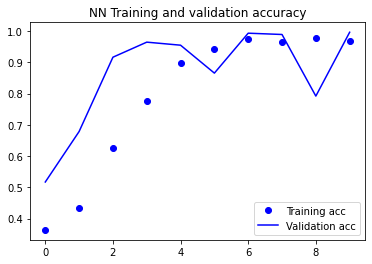

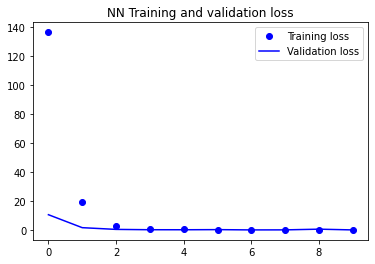

In [21]:
import matplotlib.pyplot as plt
acc = nn_history.history['acc']
val_acc = nn_history.history['val_acc']
loss = nn_history.history['loss']
val_loss = nn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('NN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('NN Training and validation loss')
plt.legend()

plt.show()

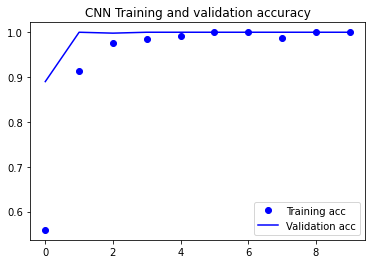

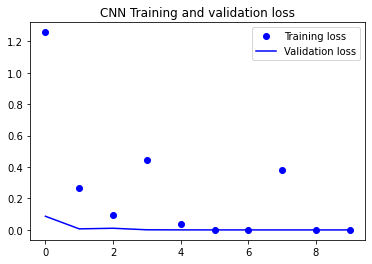

In [22]:
acc = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN Training and validation loss')
plt.legend()

plt.show()

### *# Take Away: CNN, while more computational expense, acheives a great accuracy than NN. This is due to its ability to capture local featues via maxpooling.*

# **Test with your own image!**

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)